In [1]:
#!/usr/bin/env python3.6
# -*- coding: utf-8 -*-

In [2]:
# Imports
import sys
import joblib
import numpy as np
from math import atan2
from matplotlib import animation
from IPython.display import HTML
from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

In [3]:
#np.random.seed(20)
np.set_printoptions(threshold=sys.maxsize)

In [4]:
%matplotlib inline

In [5]:
%store -r X_motion_CoM
%store -r Y_motion_CoM
print(X_motion_CoM.shape)
print(Y_motion_CoM.shape)

(4984, 24)
(4984, 2)


In [6]:
X_motion_CoM[0]

array([0.1, 0.0, 0.0, 0.233, 0.174, -0.0, -0.236, 0.175, 0.001, 0.234,
       -0.171, 0.001, -0.236, -0.172, -0.0, 0.02870726376608386,
       0.010158223220947794, 0.08854511960487796, -0.00426585718555013,
       -0.007211680701506326, True, False, 0, 0], dtype=object)

In [7]:
Y_motion_CoM[0]

array([0.012503411481062042, 0.0040971903953933055], dtype=object)

# Multivariate Linear Regression (CoM Prediction)

In [8]:
import sklearn
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Predict CoM (x) movement

In [9]:
X_motion_CoM[0, :]

array([0.1, 0.0, 0.0, 0.233, 0.174, -0.0, -0.236, 0.175, 0.001, 0.234,
       -0.171, 0.001, -0.236, -0.172, -0.0, 0.02870726376608386,
       0.010158223220947794, 0.08854511960487796, -0.00426585718555013,
       -0.007211680701506326, True, False, 0, 0], dtype=object)

In [10]:
Y_motion_CoM[0, :]

array([0.012503411481062042, 0.0040971903953933055], dtype=object)

### Linear Regression

In [12]:
# Input
X = np.hstack((X_motion_CoM[:, :3], # motion command
               X_motion_CoM[:, 3:5], # FL (x,y) position
               X_motion_CoM[:, 6:8], # FR (x,y) position
               X_motion_CoM[:, 9:11], # RL (x,y) position
               X_motion_CoM[:, 12:14], # RR (x,y) position
               X_motion_CoM[:, -4:-2])) # Swing/Support foot

# Labels
Y = np.array([Y_motion_CoM[:, 0]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True, random_state=100)

# Create the model
model_fr_com_x = LinearRegression()

# Fit the model
model_fr_com_x.fit(X_train, Y_train)

# Predict
predictions = model_fr_com_x.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.9958657935579914
RMSE:  0.0017177144661303493
The lowest error is:  2.1312810538631766e-06
The highest error is:  0.01235809780000352
The avg. error is:  0.0011080694818311856


In [13]:
model_fr_com_x.coef_

array([[ 1.79867927e-01, -4.01948623e-03, -1.15786438e+08,
         2.95290872e-01, -1.66947055e-01,  2.20931814e-01,
        -1.17274049e-01,  1.91605147e-01,  1.04434247e-01,
         1.19933667e-01,  8.62296592e-02,  3.14668779e+09,
         3.14668779e+09]])

In [14]:
model_fr_com_x.intercept_

array([-3.14668779e+09])

Text(0, 0.5, 'Predictions')

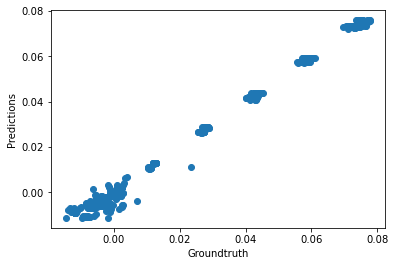

In [15]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Groundtruth")
plt.ylabel("Predictions")

In [41]:
%store model_fr_com_x

Stored 'model_fr_com_x' (LinearRegression)


In [42]:
#for idx, prediction in enumerate(predictions):
#    print(f'Command: {X_test[idx, :3]}. Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [43]:
# Save model
joblib.dump(model_fr_com_x, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/model_fr_com_x.sav")

['/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/model_fr_com_x.sav']

## Predict CoM (y) movement

### Linear Regression

In [29]:
# Input
#X = np.hstack((X_motion_CoM[:, :2], 
#               np.array([X_motion_CoM[:, 6]]).T,
#               np.array([X_motion_CoM[:, 9]]).T,
#               np.array([X_motion_CoM[:, 12]]).T,
#               np.array([X_motion_CoM[:, 15]]).T))
X = np.hstack((X_motion_CoM[:, :2], 
               np.array([X_motion_CoM[:, 5]]).T,
               X_motion_CoM[:, 6:8],
               X_motion_CoM[:, 9:11],
               X_motion_CoM[:, 12:14],
               X_motion_CoM[:, 15:17],
               X_motion_CoM[:, 18:20],
               np.array([X_motion_CoM[:, 23]]).T,
               X_motion_CoM[:, 24:26],
               #X_motion_CoM[:, 26:28]))
               np.array([X_motion_CoM[:, 27]]).T))

# Label matrix which consists only of
# the next x coordinate of the FR foot.
# We dont consider the first row.
Y = np.array([Y_motion_CoM[:, 1]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, test_size=0.2, shuffle=True, random_state=100)

# Create the model
model_fr_com_y = LinearRegression()

# Fit the model
model_fr_com_y.fit(X_train, Y_train)

# Predict
predictions = model_fr_com_y.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.9022896071558365
RMSE:  0.01238595344639214
The lowest error is:  1.2220925243999758e-09
The highest error is:  0.08059672498164228
The avg. error is:  0.008072790354919483


In [23]:
model_fr_com_y.coef_

array([[-0.00441734,  0.01496484,  0.01807551, -0.10798794,  1.49287406,
        -0.12222931, -0.25313078,  0.11289323, -0.20699757,  0.16328088,
         0.13514436]])

In [29]:
model_fr_com_y.intercept_

array([-0.06957352])

Text(0, 0.5, 'Predictions')

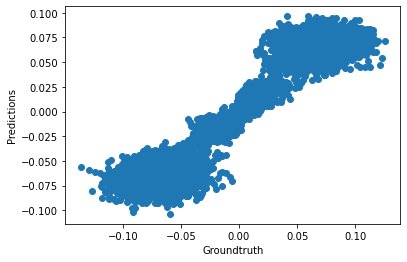

In [30]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Groundtruth")
plt.ylabel("Predictions")

In [50]:
%store model_fr_com_y

Stored 'model_fr_com_y' (LinearRegression)


In [51]:
#for idx, prediction in enumerate(predictions):
#    print(f'Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [52]:
# Save model
joblib.dump(model_fr_com_y, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/model_fr_com_y.sav")

['/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/model_fr_com_y.sav']